In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


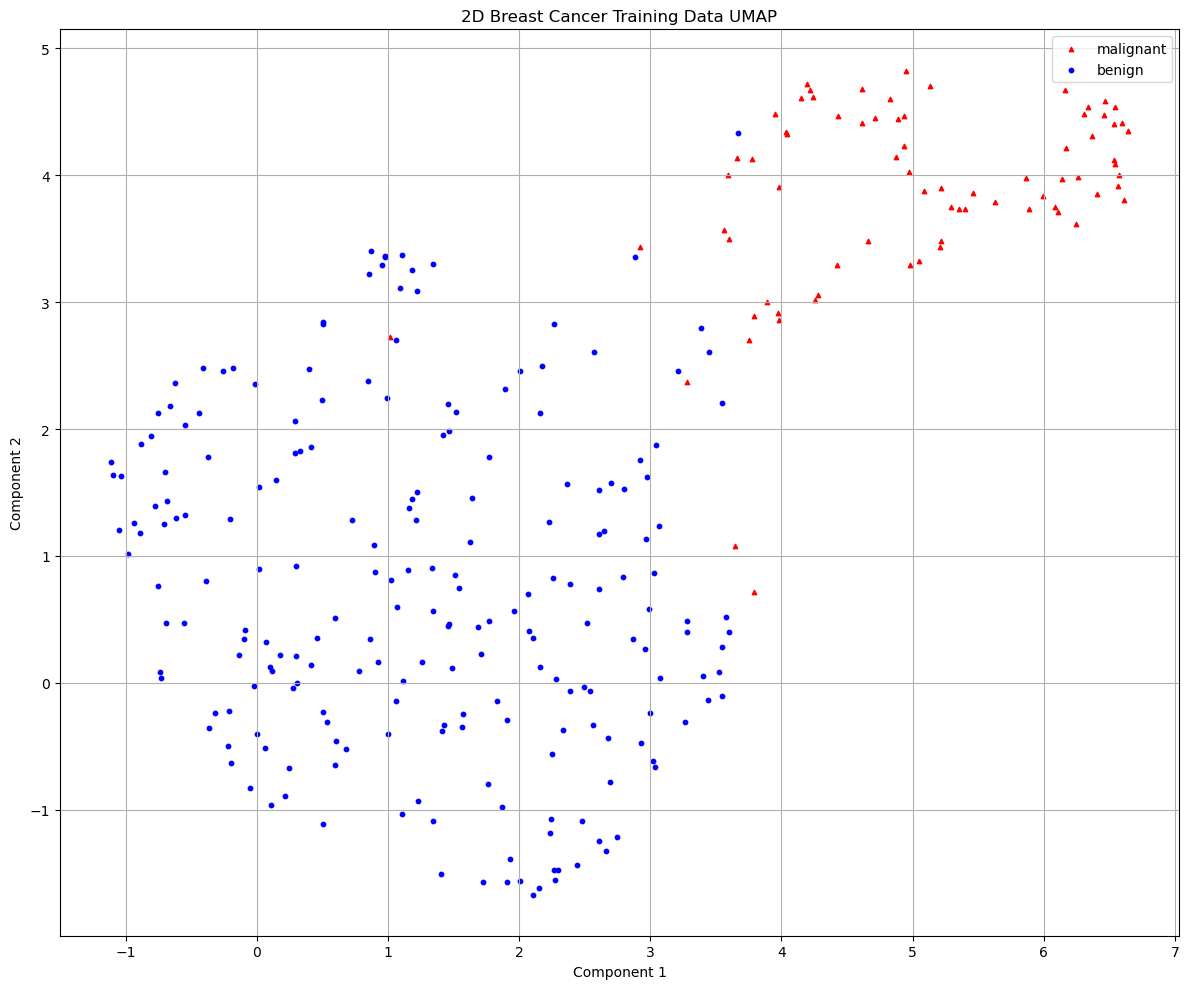

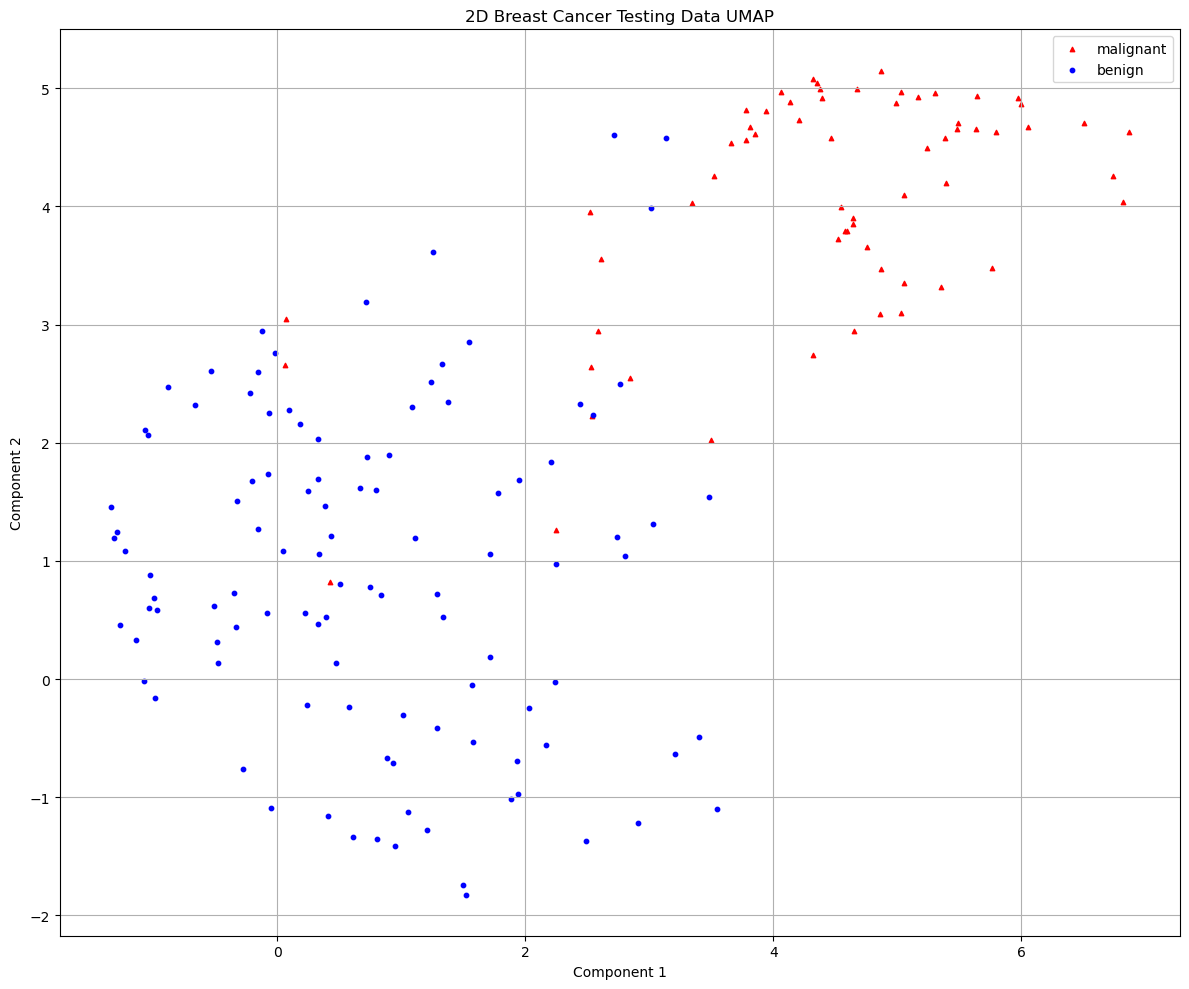

[I 2025-04-27 03:19:30,724] A new study created in memory with name: no-name-291b756e-bcd4-43f3-b3ee-ae795ac8b853
[I 2025-04-27 03:19:36,149] Trial 0 finished with value: 0.9861464004839686 and parameters: {'n_estimators': 5097, 'learning_rate': 0.0012408127857411679, 'num_leaves': 72, 'max_depth': 12, 'min_child_samples': 50, 'subsample': 0.4683724367444895, 'colsample_bytree': 0.8595454283402917, 'reg_alpha': 0.2614226026154689, 'reg_lambda': 7.168613481062e-05}. Best is trial 0 with value: 0.9861464004839686.
[I 2025-04-27 03:19:38,886] Trial 1 finished with value: 0.9755595886267393 and parameters: {'n_estimators': 5333, 'learning_rate': 0.09476066090448224, 'num_leaves': 54, 'max_depth': 8, 'min_child_samples': 15, 'subsample': 0.47363681563620597, 'colsample_bytree': 0.8241412919475901, 'reg_alpha': 1.6334313859612626e-05, 'reg_lambda': 1.4403651822935824e-05}. Best is trial 0 with value: 0.9861464004839686.
[I 2025-04-27 03:19:41,975] Trial 2 finished with value: 0.9721113127646

Best trial:
Accuracy: 0.9861464004839686
Best hyperparameters:  {'n_estimators': 5097, 'learning_rate': 0.0012408127857411679, 'num_leaves': 72, 'max_depth': 12, 'min_child_samples': 50, 'subsample': 0.4683724367444895, 'colsample_bytree': 0.8595454283402917, 'reg_alpha': 0.2614226026154689, 'reg_lambda': 7.168613481062e-05}


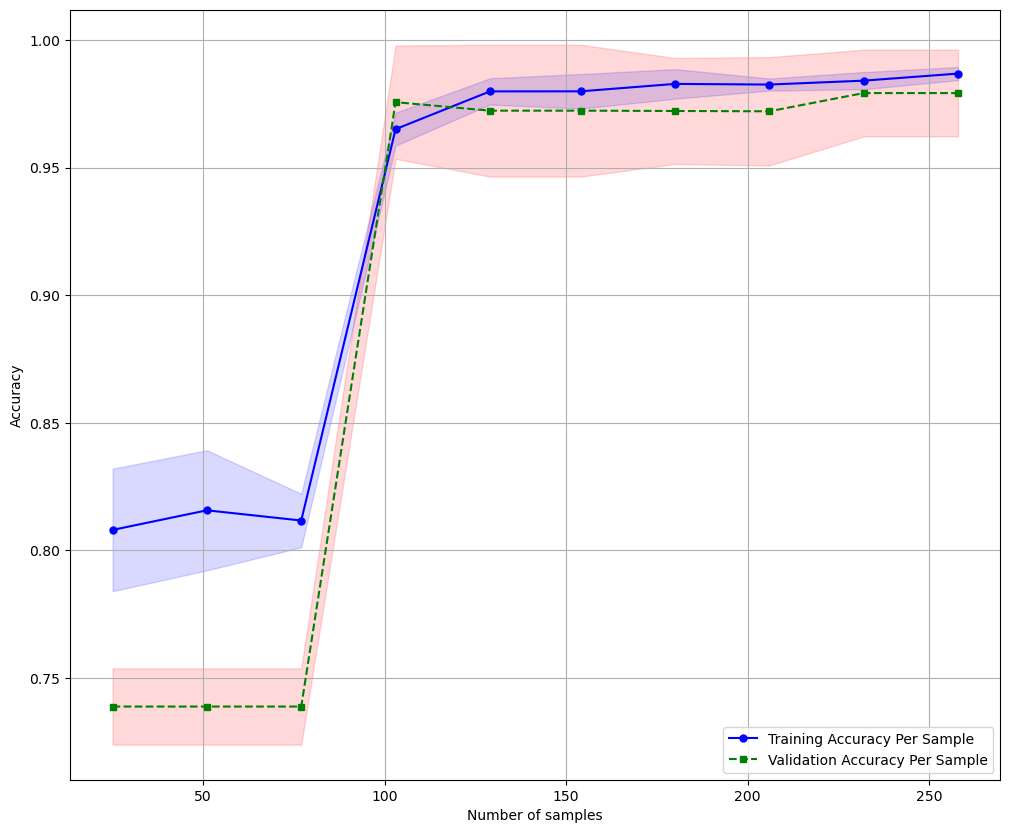

Confusion Matrix
[[ 51  13]
 [  0 107]]
Accuracy: 0.9240, Precision: 0.8917, Recall: 1.0000, F1: 0.9427, AUC:0.9722


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)